In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as data


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader


In [ ]:
start="2011-01-01"
end="2022-03-19"
df=data.DataReader("AXISBANK.NS","yahoo",start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,274.399994,268.459991,273.000000,273.529999,5266100.0,252.557571
2011-01-04,275.320007,268.700012,274.579987,269.589996,6919075.0,248.919693
2011-01-05,270.200012,260.600006,270.200012,262.179993,8749390.0,242.077805
2011-01-06,264.420013,260.000000,263.269989,261.170013,3967170.0,241.145279
2011-01-07,260.070007,252.779999,260.070007,256.130005,12047915.0,236.491684


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-14,712.400024,685.000000,694.700012,710.049988,10720884.0,710.049988
2022-03-15,718.000000,695.000000,713.000000,698.150024,12157425.0,698.150024
2022-03-16,726.000000,709.099976,711.000000,723.849976,10038170.0,723.849976
2022-03-17,746.750000,736.450012,737.000000,739.250000,13657428.0,739.250000
2022-03-17,746.750000,736.450012,737.000000,739.250000,13647901.0,739.250000


In [ ]:
df.describe()


,High,Low,Open,Close,Volume,Adj Close
count,2764.000000,2764.000000,2764.000000,2764.000000,2.764000e+03,2764.000000
mean,479.458348,465.971439,473.062352,472.616209,1.137107e+07,465.728798
std,185.873381,181.968059,184.119883,183.935496,9.735981e+06,188.566073
min,163.000000,152.679993,156.559998,156.570007,0.000000e+00,148.441711
25%,277.555000,270.479988,274.150009,273.587502,5.959235e+06,259.377632
50%,502.100006,488.074997,495.550003,494.175003,8.566898e+06,486.608734
75%,616.862518,597.312500,609.250000,607.550003,1.285518e+07,605.872559
max,866.900024,825.450012,848.400024,845.099976,1.205419e+08,845.099976


In [ ]:
df=df.reset_index()
df=df.drop(["Date","Adj Close"],axis=1)

In [ ]:
df.head()

,High,Low,Open,Close,Volume
0,274.399994,268.459991,273.000000,273.529999,5266100.0
1,275.320007,268.700012,274.579987,269.589996,6919075.0
2,270.200012,260.600006,270.200012,262.179993,8749390.0
3,264.420013,260.000000,263.269989,261.170013,3967170.0
4,260.070007,252.779999,260.070007,256.130005,12047915.0


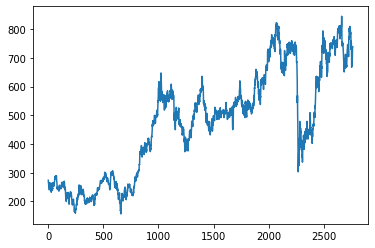

In [ ]:
plt.plot(df.Close)

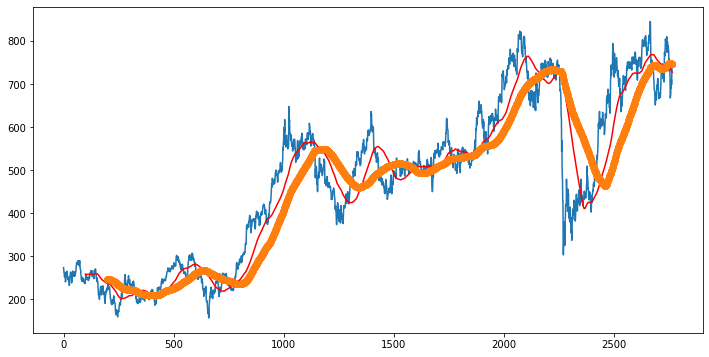

In [ ]:
avg100=df.Close.rolling(100).mean()
avg200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(avg100,"r")
plt.plot(avg200,"o")

In [ ]:
df.shape

(2764, 5)

In [ ]:
training_data=pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
testing_data=pd.DataFrame(df["Close"][int(len(df)*0.70):])
testing_data.shape
training_data.shape

(1934, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))

In [ ]:
training_data_arr=minmax.fit_transform(training_data)
training_data_arr

array([[0.23230316],
       [0.22447762],
       [0.20976005],
       ...,
       [0.92919289],
       [0.89552718],
       [0.8943354 ]])

In [ ]:
x_train=[]
y_train=[]

for i in range(100,training_data_arr.shape[0]):
  x_train.append(training_data_arr[i-100:i])
  y_train.append(training_data_arr[i,0])
# x_train

x_train,y_train = np.array(x_train),np.array(y_train)


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation="relu",return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 28s 249ms/step - loss: 0.0569
Epoch 2/50
58/58 [==============================] - 15s 251ms/step - loss: 0.0149
Epoch 3/50
58/58 [==============================] - 15s 263ms/step - loss: 0.0106
Epoch 4/50
58/58 [==============================] - 20s 338ms/step - loss: 0.0111
Epoch 5/50
58/58 [==============================] - 15s 253ms/step - loss: 0.0095
Epoch 6/50
58/58 [==============================] - 18s 312ms/step - loss: 0.0092
Epoch 7/50
58/58 [==============================] - 14s 249ms/step - loss: 0.0082
Epoch 8/50
58/58 [==============================] - 15s 250ms/step - loss: 0.0079
Epoch 9/50
58/58 [==============================] - 14s 249ms/step - loss: 0.0084
Epoch 10/50
58/58 [==============================] - 14s 249ms/step - loss: 0.0079
Epoch 11/50
58/58 [==============================] - 15s 259ms/step - loss: 0.0067
Epoch 12/50
58/58 [==============================] - 15s 250ms/step - loss: 0.0078
Epoch 13/50
5

In [ ]:
# model.save("model.h5",/content/gdrive/My Drive/)
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import torch
!pip install pyyaml h5p
model_save_name = 'model_lstm.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model.save(path)

ERROR: Could not find a version that satisfies the requirement h5p (from versions: none)
ERROR: No matching distribution found for h5p


In [ ]:
past_100=training_data.tail(100)
final_df=past_100.append(testing_data,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,540.650024
1,532.000000
2,528.750000
3,522.549988
4,517.200012


In [ ]:
ip_data=minmax.fit_transform(final_df)
ip_data.shape

(930, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,ip_data.shape[0]):
  x_test.append(ip_data[i-100:i])
  y_test.append(ip_data[i,0])

In [ ]:
x_test,y_test = np.array(x_test),np.array(y_test)
# X_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape
# y_test.shape

(830, 100, 1)

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
y_test

array([0.5721008 , 0.55983025, 0.58151122, 0.57117821, 0.59590367,
       0.584279  , 0.57782084, 0.57108597, 0.59728756, 0.57459176,
       0.60503737, 0.5943353 , 0.59931733, 0.60568326, 0.5952579 ,
       0.59350494, 0.59064492, 0.57532988, 0.54783652, 0.5550328 ,
       0.52984593, 0.55558634, 0.58455582, 0.58298735, 0.58510936,
       0.57938932, 0.58354099, 0.62459644, 0.60854328, 0.58621643,
       0.57542212, 0.58372547, 0.58012733, 0.59396624, 0.58446359,
       0.59811792, 0.5847403 , 0.56241356, 0.58390994, 0.61684663,
       0.64166444, 0.67709197, 0.66445247, 0.67044934, 0.65697948,
       0.65956268, 0.66583637, 0.68917805, 0.66694343, 0.65900914,
       0.66140787, 0.66140787, 0.66519059, 0.6764462 , 0.65162839,
       0.6598395 , 0.71556422, 0.77414897, 0.76409267, 0.77008953,
       0.78669623, 0.77977677, 0.78789565, 0.76805987, 0.75228341,
       0.74259617, 0.72303722, 0.70753759, 0.71990037, 0.71943908,
       0.73290893, 0.72709665, 0.73604577, 0.73909038, 0.75099

In [ ]:
minmax.scale_

array([0.00184519])

In [ ]:
scale_fac=1/0.00184519

In [ ]:
y_predicted=y_predicted*scale_fac
y_test=y_test*scale_fac

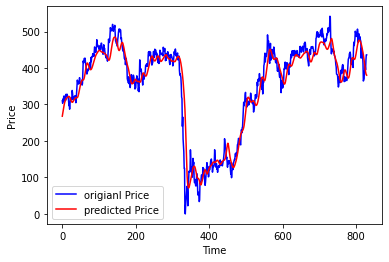

In [ ]:
plt.plot(y_test,"b",label="origianl Price")
plt.plot(y_predicted,"r",label="predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()